In [1]:
%pylab inline


# from osgeo import gdal
# from osgeo import gdal_array


import cartopy.crs as ccrs
import matplotlib.pyplot as plt

from cartopy.io import PostprocessedRasterSource, LocatedImage
from cartopy.io import srtm
from cartopy.io.srtm import SRTM3Source
import cartopy.feature as cfeature

# import scipy.ndimage
# import scipy.misc

from scipy.io import netcdf

from PIL import Image
import imageio





Populating the interactive namespace from numpy and matplotlib


In [2]:
globaletopo_imgS = imageio.imread("../Animation/Etopo1_3600x1800.tif")

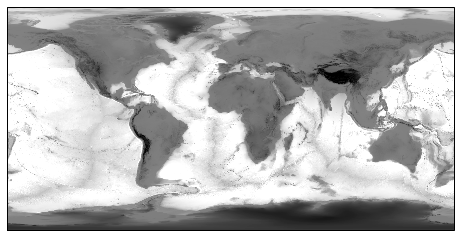

In [3]:
lon=180.0
global_extent     = [-180.0, 180.0, -90.0, 90.0]


projection1 = ccrs.Orthographic(central_longitude=lon, central_latitude=0.0, globe=None)
base_projection = ccrs.PlateCarree()

fig = plt.figure(figsize=(8, 8), facecolor="none")
ax = plt.subplot(111, projection=base_projection)
ax.set_global()
ax.imshow(globaletopo_imgS, origin='upper', 
          transform=base_projection, 
          extent=global_extent, 
          cmap=matplotlib.cm.gray_r, vmin=-5000, vmax=5000,
          zorder=0)

In [4]:
event_dict = {}

In [5]:
from obspy.core import event
from obspy.clients.fdsn import Client, RoutingClient
from obspy import UTCDateTime

client = Client("IRIS")
extent = global_extent


for year in range(1975, 2020, 1):
    
    starttime = UTCDateTime("{}-01-01".format(year))
    endtime   = UTCDateTime("{}-12-31".format(year))
    
    cat = client.get_events(starttime=starttime, endtime=endtime,
                            minlongitude=global_extent[0],
                            maxlongitude=global_extent[1],
                            minlatitude=global_extent[2],
                            maxlatitude=global_extent[3],
                            minmagnitude=4.5)

    print (cat.count(), " events in catalogue for year", year)
    
    event_count = cat.count()

    eq_origins = np.zeros((event_count, 5))

    for ev, event in enumerate(cat.events):
        eq_origins[ev,0] = dict(event.origins[0])['longitude']
        eq_origins[ev,1] = dict(event.origins[0])['latitude']
        eq_origins[ev,2] = dict(event.origins[0])['depth']
        eq_origins[ev,3] = dict(event.magnitudes[0])['mag']
        eq_origins[ev,4] = (dict(event.origins[0])['time']).month

    event_dict[year] = eq_origins

np.save('events_4.5+by_year_1970-2019.npy', event_dict) 

4070  events in catalogue for year 1975
4191  events in catalogue for year 1976
4153  events in catalogue for year 1977
3921  events in catalogue for year 1978
3953  events in catalogue for year 1979
4321  events in catalogue for year 1980
4152  events in catalogue for year 1981
4204  events in catalogue for year 1982
4960  events in catalogue for year 1983
4807  events in catalogue for year 1984
4953  events in catalogue for year 1985
5030  events in catalogue for year 1986
4438  events in catalogue for year 1987
4579  events in catalogue for year 1988
4560  events in catalogue for year 1989
4939  events in catalogue for year 1990
4540  events in catalogue for year 1991
5463  events in catalogue for year 1992
4907  events in catalogue for year 1993
4890  events in catalogue for year 1994
5699  events in catalogue for year 1995
5124  events in catalogue for year 1996
5239  events in catalogue for year 1997
4462  events in catalogue for year 1998
5193  events in catalogue for year 1999


In [6]:
# Load
read_dictionary = np.load('isc_events_by_year_1960-2015.npy').item()
print(read_dictionary) # displays "world"

FileNotFoundError: [Errno 2] No such file or directory: 'isc_events_by_year_1960-2015.npy'